# Kernels

In this demo, you will learn to:
* Compute 2D convolutions on images using `scipy`.
* Visualize the outputs of convolutions


## Loading and Displaying Images

We first import several packages.  Two important packages we will use are: 
* `scipy.signal`: sub-package which has useful routines for 2D convolutions
* `skimage.data`: sub-package for getting some basic images.

In [1]:
import numpy as np
import scipy.signal
import skimage.data
import matplotlib.pyplot as plt
%matplotlib inline

We next create a function to display images that we will use throughout the demo.  The function does both gray-scale and color images.

In [2]:
# Display the image
def disp_image(im):
    if len(im.shape) == 2:
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im - np.min(im)) / (np.max(im) - np.min(im)) * 255
        im1 = im1.astype(dtype=np.uint8) 
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

The `skimage.data` package has several commonly used images in image processing.  We begin by loading a widely-used "cameraman" image.  

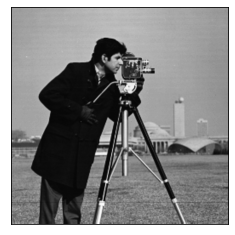

In [3]:
im = skimage.data.camera()
disp_image(im)

We print the image shape

In [4]:
print(f"The image shape is: {im.shape}")

The image shape is: (512, 512)


We can also load images from files using the `skimage.io.imread` function.  This function can handle most common image formats including, for example, JPG.

## Performing 2D Convolutions

To illustrate 2D convolution, we first apply an averaging filter, which essentially replaces each pixel by the average of a neighborhood of `KxK` pixels to the top left of the current pixel. Filtering an image with this filter has a **smoothing effect**.  

In image processing, convolving with an averaging filter can be useful as a crude noise removal filter. 





In [5]:
kx = 9
ky = 9
G_unif = np.ones((kx, ky)) / (kx * ky)

G_unif

array([[0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],


Text(0.5, 1.0, 'Uniform kernel, Valid')

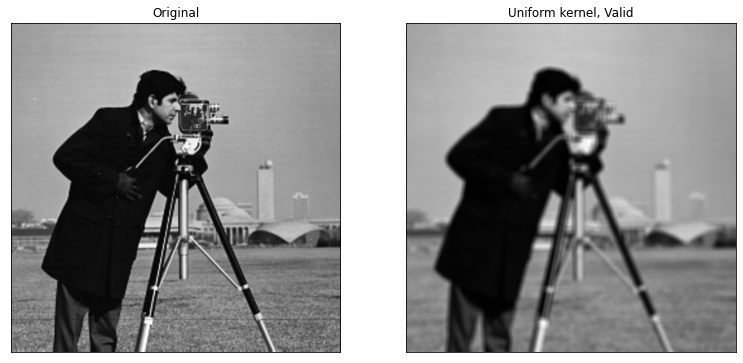

In [6]:
im_unif_valid = scipy.signal.correlate2d(im, G_unif, mode='valid')

# Plot the original image and the output
plt.figure(figsize=(13, 13))
plt.subplot(1, 2, 1)
disp_image(im)
plt.title('Original')
plt.subplot(1, 2, 2)
disp_image(im_unif_valid)
plt.title('Uniform kernel, Valid')

Let us look at the image sizes. Let `K` represent filter width, `Ni` image width, `No` output width. Then:


* `valid`:  `No=Ni-K+1`.

In [7]:
print(f"Input shape = {im.shape}")
print(f"Output shape (valid) = {im_unif_valid.shape}")

Input shape = (512, 512)
Output shape (valid) = (504, 504)


Now let us take a closer look at the output near the boundaries

Text(0.5, 1.0, 'Uniform kernel, Valid')

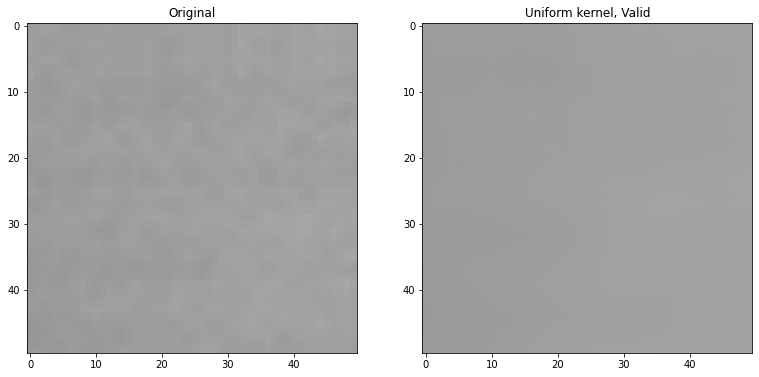

In [8]:
# Plot the original image and the three outputs at the top left corner
plt.figure(figsize=(13, 13))
plt.subplot(1, 2, 1)
plt.imshow(im[0:50,0:50], vmin=0, vmax=255, cmap='gray')
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(im_unif_valid[0:50, 0:50], vmin=0, vmax=255, cmap='gray')
plt.title('Uniform kernel, Valid')

Now let us look at the effect of increasing the average window size. As we can see, the larger is `K`, the more blured the image becomes.


Text(0.5, 1.0, 'Uniform kernel, 15x15')

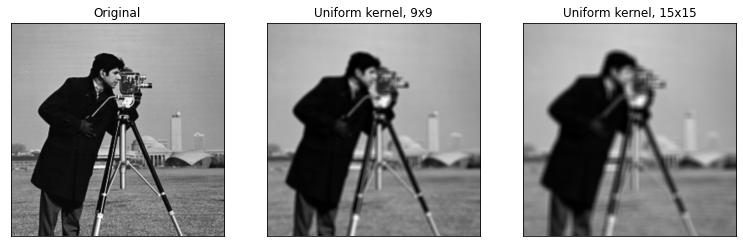

In [9]:
kx = 9
ky = 9

G_unif = np.ones((kx, ky)) / (kx * ky)
im_unif_9 = scipy.signal.correlate2d(im, G_unif, mode='valid')


kx = 15
ky = 15
G_unif = np.ones((kx, ky)) / (kx * ky)
im_unif_15 = scipy.signal.correlate2d(im, G_unif, mode='valid')

# Plot the original image and the three outputs
plt.figure(figsize=(13,13))
plt.subplot(1,3,1)
disp_image(im)
plt.title('Original')
plt.subplot(1,3,2)
disp_image(im_unif_9)
plt.title('Uniform kernel, 9x9')
plt.subplot(1,3,3)
disp_image(im_unif_15)
plt.title('Uniform kernel, 15x15')

Compared to the averaging filter, the Gaussian kernel also performs an averaging, but weights the pixels at the center of the kernel more. You can control the bluring strength with the standard deviation sigma of the Gaussian kernel. 

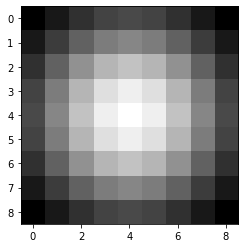

In [10]:
def gauss_kernel(nx,ny,sig):
    """
    Creates a Gaussian kernel of size (nx,ny) with std deviation sig
    """
    dxsq = (np.arange(nx)-(nx-1)/2)**2
    dysq = (np.arange(ny)-(ny-1)/2)**2
    dsq = dxsq[:,None] + dysq[None,:]
    G = np.exp(-0.5*dsq/(sig**2))
    G = G / np.sum(G)
    return G

# Create a Gaussian kernel
kx = 9
ky = 9
sig = 3
G_unif = np.ones((kx, ky)) / (kx * ky)

# Create a Gaussian kernel
G_gauss = gauss_kernel(kx, ky, sig)
plt.imshow(G_gauss,interpolation='None', cmap='gray')

Now let us compare effect of averaging and Gaussian filtering, with different sizes

Text(0.5, 1.0, 'Gaussian kernel, 15x15')

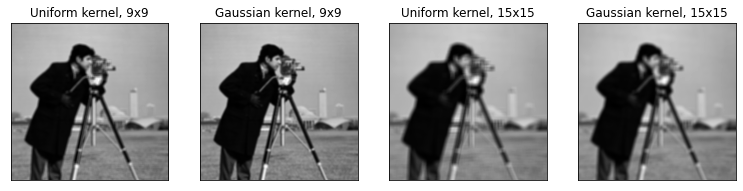

In [11]:
# Correlate with 9 x 9 Gaussian
kx = 9
ky = 9
sig = 3
G_gauss = gauss_kernel(kx, ky, sig)
im_gauss_9 = scipy.signal.correlate2d(im, G_gauss, mode='valid')

# Correlate with 15 x 15 Gaussian
kx = 15
ky = 15
sig = 6
G_gauss = gauss_kernel(kx,ky,sig)
im_gauss_15 = scipy.signal.correlate2d(im, G_gauss, mode='valid')


plt.figure(figsize=(13,13))
plt.subplot(1,4,1)
disp_image(im_unif_9)
plt.title('Uniform kernel, 9x9')
plt.subplot(1,4,2)
disp_image(im_gauss_9)
plt.title('Gaussian kernel, 9x9')
plt.subplot(1,4,3)
disp_image(im_unif_15)
plt.title('Uniform kernel, 15x15')
plt.subplot(1,4,4)
disp_image(im_gauss_15)
plt.title('Gaussian kernel, 15x15')


In addtion to noise removal, a common use of convolution is **edge detection** by using a filter that approximates the operation of gradient in horizontal and vertical directions. One such filter set is called the [Sobel filters](https://en.wikipedia.org/wiki/Sobel_operator), `Gx` and `Gy`.  The filter **`Gx`** filter will have a large response when there is a large **change in the x-direction (vertical edges)**.  Similarly, **`Gy`** will have a large response for a large **change in the image in the y-direction (horizontal edges)**.   In any part of the image that is flat, the output is zero. Without filter reversal, the response is positive if the change is from black to white.

In [11]:
Gx = np.array([[1,0,-1],
               [2,0,-2],
               [1,0,-1]])  # change in the x-direction
Gy = np.array([[1,2,1],
               [0,0,0],
               [-1,-2,-1]])  # change in the y-direction
Gxy = np.array([[-1,-1,-1],
                [-1,8,-1],
                [-1,-1,-1]])  # Every edge

Text(0.5, 1.0, 'Gxy * image')

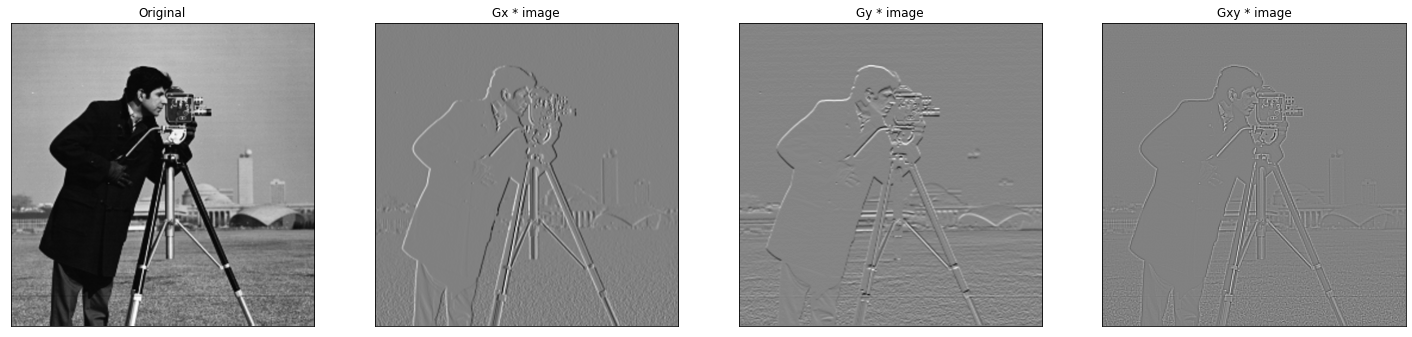

In [12]:
# Perform the convolutions
imx = scipy.signal.correlate2d(im, Gx, mode='valid')
imy = scipy.signal.correlate2d(im, Gy, mode='valid')
imxy = scipy.signal.correlate2d(im, Gxy, mode='valid')


# Plot the original image and the two outputs
plt.figure(figsize=(25,25))
plt.subplot(1, 4, 1)
disp_image(im)
plt.title('Original')
plt.subplot(1, 4, 2)
disp_image(imx)
plt.title('Gx * image')
plt.subplot(1,4, 3)
disp_image(imy)
plt.title('Gy * image')
plt.subplot(1,4, 4)
disp_image(imxy)
plt.title('Gxy * image')

Text(0.5, 1.0, 'Sharpen')

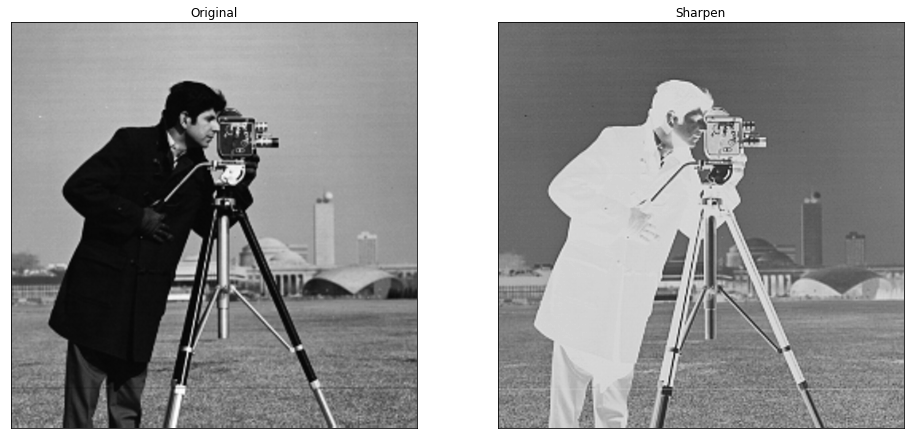

In [13]:
G = (1 / 256) * np.array([[1, 4, 6, 4, 1],
                          [4, 16, 24, 16, 4],
                          [6, 24, -476, 24, 6],
                          [4, 16, 24, 16, 4],
                          [1, 4, 6, 4, 1]])


im_sharp = scipy.signal.correlate2d(im, G, mode='valid')
plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
disp_image(im)
plt.title('Original')
plt.subplot(1,2,2)
disp_image(im_sharp)
plt.title('Sharpen')